In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import STL

In [244]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [258]:
df = df.drop_duplicates(subset=['date_time'])

In [259]:
df['date_time'] =  pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [260]:
df['Dayofweek'] = df['date_time'].dt.day_name()

In [261]:
# we will sort data frame in acending order because we will deal with time series data
df_sorted = df.sort_values(by='date_time')

In [262]:
# we here set date time column as index of data frame
df_sorted = df_sorted.set_index(pd.DatetimeIndex(df_sorted['date_time']))

In [263]:
# show the first five rows
df_sorted.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Dayofweek
date_time,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,Tuesday
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,Tuesday
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,Tuesday
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,Tuesday
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,Tuesday


In [264]:
Start_date = datetime(2018,7,1,0)
End_date = datetime(2018,9,29,12)

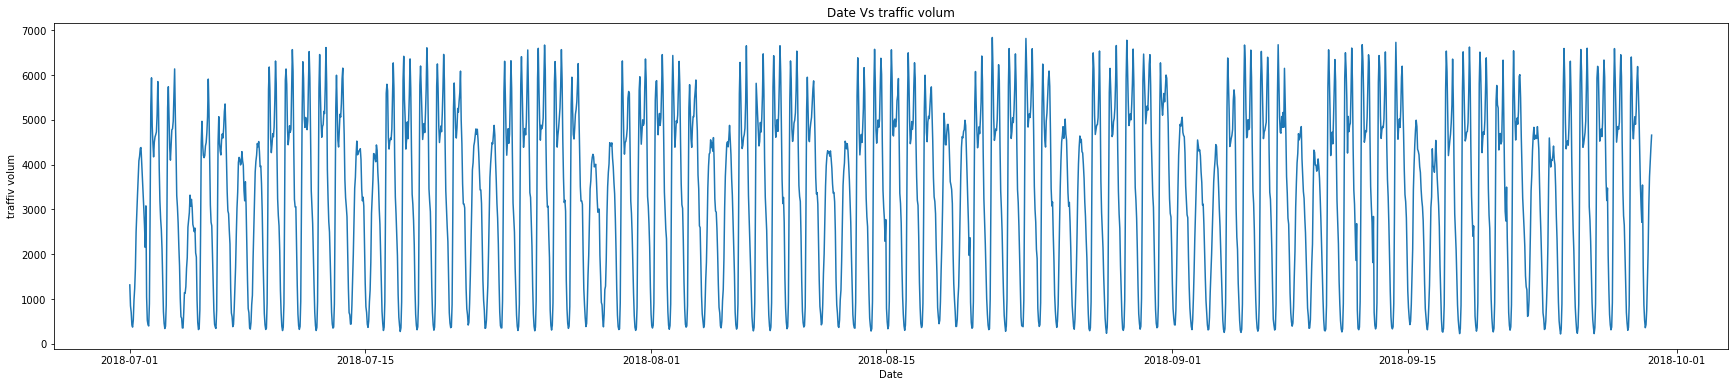

In [265]:
# plot Date Vs traffic
plt.figure(figsize=(30,6))
plt.plot(df_sorted.traffic_volume[Start_date:End_date])
plt.xlabel('Date')
plt.ylabel('traffiv volum')
plt.title('Date Vs traffic volum')
plt.show()

## Take some of this data to study it

In [266]:
portion_df = df_sorted.traffic_volume[Start_date:End_date]

In [269]:
portion_df[datetime(2018,9,19,9)] = 10000
portion_df[datetime(2018,9,9,10)] = 9000
portion_df[datetime(2018,8,28,13)] = 11000

Text(0, 0.5, 'Trafic')

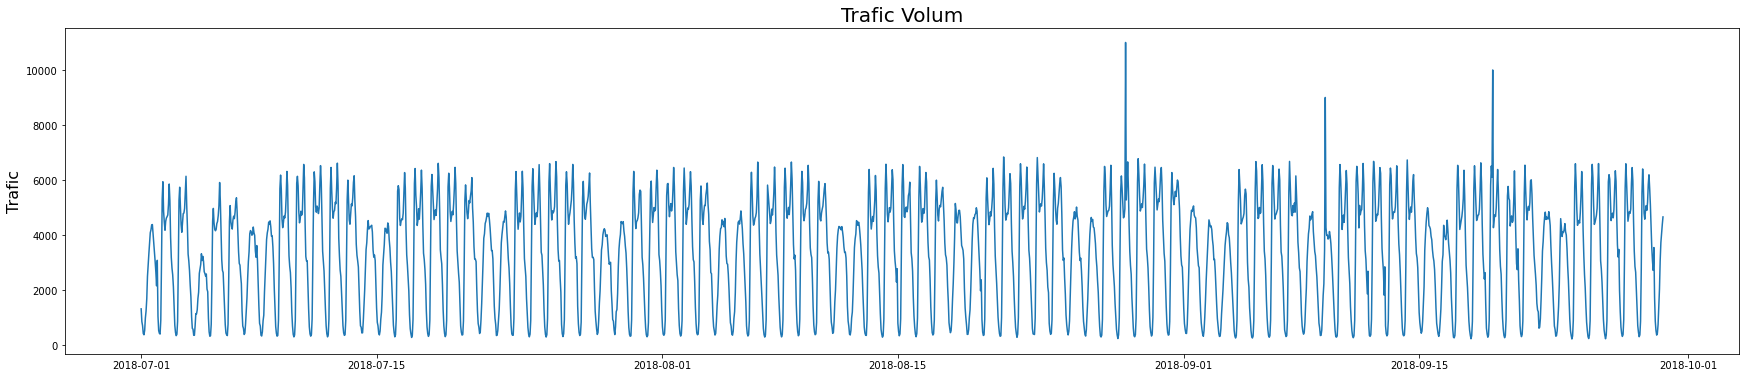

In [270]:
plt.figure(figsize=(30,6))
plt.plot(portion_df)
plt.title('Trafic Volum', fontsize=20)
plt.ylabel('Trafic', fontsize=16)

# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# Remove the trend

In [271]:
first_diff = portion_df.diff()[1:]

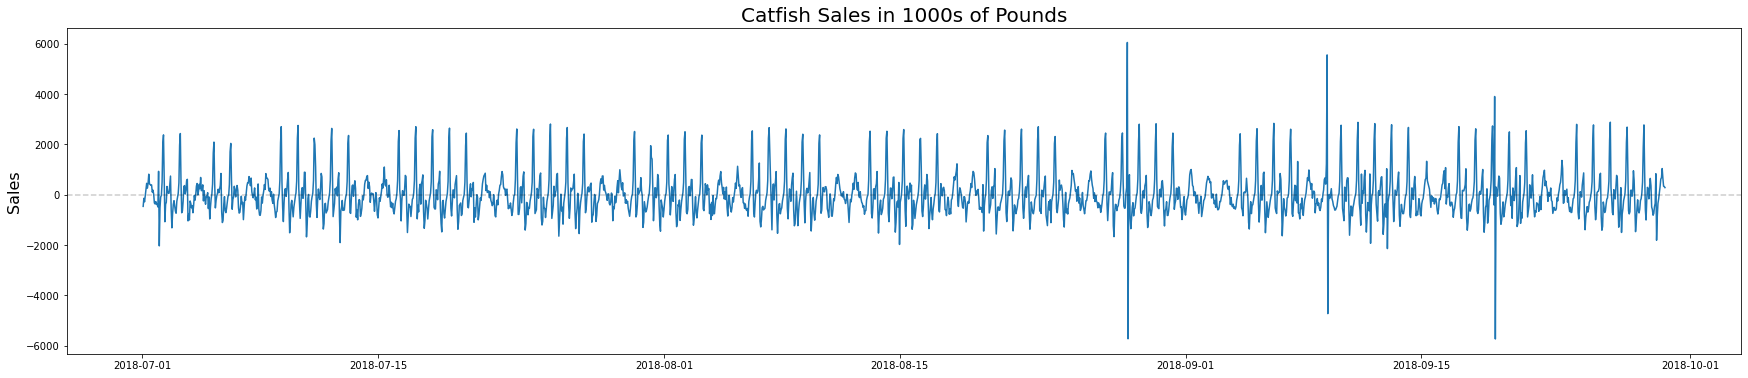

In [272]:
plt.figure(figsize=(30,6))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

# Get training and testing sets

In [275]:
train_end = datetime(2018,9,27,0)
test_data = portion_df[train_end + timedelta(days=1):]

In [276]:
test_data.shape

(37,)

# Make Predictions

In [277]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [278]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = portion_df[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05423D+00    |proj g|=  3.31652D-01

At iterate    5    f=  7.95780D+00    |proj g|=  6.47132D-02

At iterate   10    f=  7.92113D+00    |proj g|=  1.56337D-02

At iterate   15    f=  7.91603D+00    |proj g|=  4.08260D-04

At iterate   20    f=  7.89335D+00    |proj g|=  1.00547D-03

At iterate   25    f=  7.89117D+00    |proj g|=  1.31935D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     37      1     0     0   

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95759D+00    |proj g|=  6.47253D-02

At iterate   10    f=  7.92091D+00    |proj g|=  1.56370D-02

At iterate   15    f=  7.91581D+00    |proj g|=  3.70031D-04

At iterate   20    f=  7.91445D+00    |proj g|=  3.60296D-04

At iterate   25    f=  7.89898D+00    |proj g|=  4.74435D-04

At iterate   30    f=  7.89123D+00    |proj g|=  5.58499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     66      1     0     0   6.204D-07   7.891D+00
  F =   7.8909025033579283     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95735D+00    |proj g|=  6.47345D-02

At iterate   10    f=  7.92067D+00    |proj g|=  1.56363D-02

At iterate   15    f=  7.91557D+00    |proj g|=  3.70083D-04

At iterate   20    f=  7.91516D+00    |proj g|=  8.11691D-04

At iterate   25    f=  7.89966D+00    |proj g|=  6.35795D-04

At iterate   30    f=  7.89067D+00    |proj g|=  6.34983D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     52      1     0     0   8.603D-07   7.891D+00
  F =   7.8906661526718844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95721D+00    |proj g|=  6.48243D-02

At iterate   10    f=  7.92050D+00    |proj g|=  1.56541D-02

At iterate   15    f=  7.91550D+00    |proj g|=  2.70013D-03

At iterate   20    f=  7.91518D+00    |proj g|=  2.75839D-03

At iterate   25    f=  7.89852D+00    |proj g|=  7.00499D-03

At iterate   30    f=  7.89785D+00    |proj g|=  1.57264D-03

At iterate   35    f=  7.89112D+00    |proj g|=  3.60465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     55      1     0     0   8.463D-06   7.890D+00
  F =   7.8904934584617044     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95726D+00    |proj g|=  6.49189D-02

At iterate   10    f=  7.92051D+00    |proj g|=  1.56686D-02

At iterate   15    f=  7.91553D+00    |proj g|=  6.67469D-04

At iterate   20    f=  7.90860D+00    |proj g|=  2.77887D-03

At iterate   25    f=  7.89812D+00    |proj g|=  3.03907D-04

At iterate   30    f=  7.89132D+00    |proj g|=  7.82892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     48      1     0     0   3.847D-06   7.890D+00
  F =   7.8904999326968523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95789D+00    |proj g|=  6.47501D-02

At iterate   10    f=  7.92116D+00    |proj g|=  1.56599D-02

At iterate   15    f=  7.91616D+00    |proj g|=  3.35908D-03

At iterate   20    f=  7.91574D+00    |proj g|=  2.55596D-03

At iterate   25    f=  7.90106D+00    |proj g|=  5.79227D-03

At iterate   30    f=  7.90054D+00    |proj g|=  2.38446D-03
  ys=-1.494E-02  -gs= 2.210E-03 BFGS update SKIPPED

At iterate   35    f=  7.89224D+00    |proj g|=  1.20240D-02

At iterate   40    f=  7.89091D+00    |proj g|=  3.59501D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     41     60      1     1

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95859D+00    |proj g|=  6.42623D-02

At iterate   10    f=  7.92198D+00    |proj g|=  1.55861D-02

At iterate   15    f=  7.91684D+00    |proj g|=  1.77431D-03

At iterate   20    f=  7.91640D+00    |proj g|=  4.69480D-04

At iterate   25    f=  7.90101D+00    |proj g|=  9.20033D-04

At iterate   30    f=  7.89910D+00    |proj g|=  5.87143D-03

At iterate   35    f=  7.89242D+00    |proj g|=  4.43520D-03

At iterate   40    f=  7.89147D+00    |proj g|=  4.15277D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     63      1     0     0   4.153D-06   7.891D+00
  F =   7.89147493032

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95840D+00    |proj g|=  6.42361D-02

At iterate   10    f=  7.92178D+00    |proj g|=  1.55796D-02

At iterate   15    f=  7.91665D+00    |proj g|=  2.08372D-03

At iterate   20    f=  7.91628D+00    |proj g|=  7.45109D-04

At iterate   25    f=  7.90163D+00    |proj g|=  8.42890D-03

At iterate   30    f=  7.90017D+00    |proj g|=  2.10119D-03
  ys=-2.605E-03  -gs= 2.165E-03 BFGS update SKIPPED

At iterate   35    f=  7.89262D+00    |proj g|=  1.12740D-02

At iterate   40    f=  7.89126D+00    |proj g|=  3.03451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42     65      1     1

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05651D+00    |proj g|=  3.35734D-01

At iterate    5    f=  7.95852D+00    |proj g|=  6.42912D-02

At iterate   10    f=  7.92192D+00    |proj g|=  1.55965D-02

At iterate   15    f=  7.91685D+00    |proj g|=  2.63611D-03

At iterate   20    f=  7.91653D+00    |proj g|=  2.64064D-03

At iterate   25    f=  7.89966D+00    |proj g|=  4.02202D-03

At iterate   30    f=  7.89919D+00    |proj g|=  2.91537D-03

At iterate   35    f=  7.89184D+00    |proj g|=  6.47495D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95846D+00    |proj g|=  6.41749D-02

At iterate   10    f=  7.92201D+00    |proj g|=  1.55792D-02

At iterate   15    f=  7.91700D+00    |proj g|=  3.71437D-04

At iterate   20    f=  7.89939D+00    |proj g|=  9.91627D-03

At iterate   25    f=  7.89579D+00    |proj g|=  6.61678D-03

At iterate   30    f=  7.89172D+00    |proj g|=  3.26290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     49      1     0     0   7.775D-06   7.892D+00
  F =   7.8915294939615812     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95891D+00    |proj g|=  6.45926D-02

At iterate   10    f=  7.92228D+00    |proj g|=  1.56766D-02

At iterate   15    f=  7.91724D+00    |proj g|=  3.71638D-04

At iterate   20    f=  7.89751D+00    |proj g|=  5.44655D-03

At iterate   25    f=  7.89339D+00    |proj g|=  8.60575D-03

At iterate   30    f=  7.89169D+00    |proj g|=  1.71588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     43      1     0     0   3.852D-06   7.892D+00
  F =   7.8916873436201467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95872D+00    |proj g|=  6.46633D-02

At iterate   10    f=  7.92206D+00    |proj g|=  1.56900D-02

At iterate   15    f=  7.91702D+00    |proj g|=  3.71679D-04

At iterate   20    f=  7.89797D+00    |proj g|=  6.74235D-03

At iterate   25    f=  7.89376D+00    |proj g|=  1.29003D-03

At iterate   30    f=  7.89148D+00    |proj g|=  2.07422D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     55      1     0     0   6.000D-06   7.891D+00
  F =   7.8914758391515534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95849D+00    |proj g|=  6.46932D-02

At iterate   10    f=  7.92183D+00    |proj g|=  1.56933D-02

At iterate   15    f=  7.91678D+00    |proj g|=  3.71711D-04

At iterate   20    f=  7.89736D+00    |proj g|=  5.76168D-03

At iterate   25    f=  7.89351D+00    |proj g|=  2.74470D-03

At iterate   30    f=  7.89125D+00    |proj g|=  1.50438D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     40      1     0     0   2.549D-07   7.891D+00
  F =   7.8912470791498484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95826D+00    |proj g|=  6.46978D-02

At iterate   10    f=  7.92160D+00    |proj g|=  1.56941D-02

At iterate   15    f=  7.91655D+00    |proj g|=  3.71777D-04

At iterate   20    f=  7.89710D+00    |proj g|=  5.67333D-03

At iterate   25    f=  7.89359D+00    |proj g|=  2.81610D-03

At iterate   30    f=  7.89116D+00    |proj g|=  2.17329D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     50      1     0     0   1.096D-06   7.891D+00
  F =   7.8910263097827746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95802D+00    |proj g|=  6.46894D-02

At iterate   10    f=  7.92137D+00    |proj g|=  1.56925D-02

At iterate   15    f=  7.91632D+00    |proj g|=  3.71865D-04

At iterate   20    f=  7.89708D+00    |proj g|=  6.22473D-03

At iterate   25    f=  7.89362D+00    |proj g|=  1.11288D-03

At iterate   30    f=  7.89106D+00    |proj g|=  2.83416D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     50      1     0     0   4.168D-06   7.891D+00
  F =   7.8907904524869492     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95813D+00    |proj g|=  6.46618D-02

At iterate   10    f=  7.92147D+00    |proj g|=  1.57024D-02

At iterate   15    f=  7.91642D+00    |proj g|=  3.72110D-04

At iterate   20    f=  7.89734D+00    |proj g|=  6.81839D-03

At iterate   25    f=  7.89422D+00    |proj g|=  1.63436D-03

At iterate   30    f=  7.89085D+00    |proj g|=  8.66170D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     51      1     0     0   2.181D-06   7.891D+00
  F =   7.8908369886336596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05598D+00    |proj g|=  3.34334D-01

At iterate    5    f=  7.95814D+00    |proj g|=  6.47454D-02

At iterate   10    f=  7.92146D+00    |proj g|=  1.57332D-02

At iterate   15    f=  7.91639D+00    |proj g|=  3.72425D-04

At iterate   20    f=  7.89609D+00    |proj g|=  3.80700D-03

At iterate   25    f=  7.89283D+00    |proj g|=  6.35372D-03

At iterate   30    f=  7.89075D+00    |proj g|=  3.33626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95818D+00    |proj g|=  6.50744D-02

At iterate   10    f=  7.92141D+00    |proj g|=  1.57826D-02

At iterate   15    f=  7.91634D+00    |proj g|=  3.72260D-04

At iterate   20    f=  7.89780D+00    |proj g|=  8.06806D-03

At iterate   25    f=  7.89472D+00    |proj g|=  2.26388D-04

At iterate   30    f=  7.89075D+00    |proj g|=  4.22040D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     49      1     0     0   1.118D-06   7.891D+00
  F =   7.8907390463997702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95799D+00    |proj g|=  6.52285D-02

At iterate   10    f=  7.92117D+00    |proj g|=  1.57812D-02

At iterate   15    f=  7.91609D+00    |proj g|=  3.72293D-04

At iterate   20    f=  7.89728D+00    |proj g|=  7.48669D-03

At iterate   25    f=  7.89252D+00    |proj g|=  2.96542D-04

At iterate   30    f=  7.89051D+00    |proj g|=  1.82308D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     38      1     0     0   3.321D-06   7.891D+00
  F =   7.8905132695630318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05595D+00    |proj g|=  3.37016D-01

At iterate    5    f=  7.95785D+00    |proj g|=  6.51498D-02

At iterate   10    f=  7.92102D+00    |proj g|=  1.57643D-02

At iterate   15    f=  7.91595D+00    |proj g|=  3.72440D-04

At iterate   20    f=  7.89736D+00    |proj g|=  8.00244D-03

At iterate   25    f=  7.89425D+00    |proj g|=  2.30255D-04

At iterate   30    f=  7.89038D+00    |proj g|=  7.95115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate    5    f=  7.95787D+00    |proj g|=  6.52584D-02

At iterate   10    f=  7.92098D+00    |proj g|=  1.57979D-02

At iterate   15    f=  7.91588D+00    |proj g|=  3.72722D-04

At iterate   20    f=  7.89719D+00    |proj g|=  7.88916D-03

At iterate   25    f=  7.89411D+00    |proj g|=  4.00903D-04

At iterate   30    f=  7.89024D+00    |proj g|=  2.32727D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     51      1     0     0   1.056D-07   7.890D+00
  F =   7.8902335366135423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95782D+00    |proj g|=  6.53934D-02

At iterate   10    f=  7.92084D+00    |proj g|=  1.58347D-02

At iterate   15    f=  7.91572D+00    |proj g|=  3.72985D-04

At iterate   20    f=  7.89708D+00    |proj g|=  8.08985D-03

At iterate   25    f=  7.89397D+00    |proj g|=  2.27137D-04

At iterate   30    f=  7.89003D+00    |proj g|=  3.84377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     46      1     0     0   5.056D-07   7.890D+00
  F =   7.8900344961956943     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95784D+00    |proj g|=  6.54762D-02

At iterate   10    f=  7.92083D+00    |proj g|=  1.58484D-02

At iterate   15    f=  7.91571D+00    |proj g|=  3.73212D-04

At iterate   20    f=  7.89572D+00    |proj g|=  5.18080D-03

At iterate   25    f=  7.89193D+00    |proj g|=  8.50807D-03

At iterate   30    f=  7.88999D+00    |proj g|=  3.75302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     39      1     0     0   4.676D-05   7.890D+00
  F =   7.8899857909270477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95772D+00    |proj g|=  6.54317D-02

At iterate   10    f=  7.92071D+00    |proj g|=  1.58454D-02

At iterate   15    f=  7.91558D+00    |proj g|=  3.73418D-04

At iterate   20    f=  7.89648D+00    |proj g|=  7.23222D-03

At iterate   25    f=  7.89136D+00    |proj g|=  1.47636D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     38      1     0     0   1.304D-06   7.890D+00
  F =   7.8898273756808175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95756D+00    |proj g|=  6.53966D-02

At iterate   10    f=  7.92055D+00    |proj g|=  1.58453D-02

At iterate   15    f=  7.91542D+00    |proj g|=  3.73593D-04

At iterate   20    f=  7.89647D+00    |proj g|=  7.59700D-03

At iterate   25    f=  7.89319D+00    |proj g|=  1.06297D-03

At iterate   30    f=  7.88968D+00    |proj g|=  3.95113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     49      1     0     0   3.117D-06   7.890D+00
  F =   7.8896426693462933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95735D+00    |proj g|=  6.53999D-02

At iterate   10    f=  7.92033D+00    |proj g|=  1.58467D-02

At iterate   15    f=  7.91520D+00    |proj g|=  3.73688D-04

At iterate   20    f=  7.89625D+00    |proj g|=  7.60505D-03

At iterate   25    f=  7.89293D+00    |proj g|=  1.10567D-03

At iterate   30    f=  7.88951D+00    |proj g|=  1.23372D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     51      1     0     0   5.301D-06   7.889D+00
  F =   7.8894209892838196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95711D+00    |proj g|=  6.54032D-02

At iterate   10    f=  7.92009D+00    |proj g|=  1.58452D-02

At iterate   15    f=  7.91496D+00    |proj g|=  3.73739D-04

At iterate   20    f=  7.89602D+00    |proj g|=  7.62319D-03

At iterate   25    f=  7.89123D+00    |proj g|=  1.05744D-03

At iterate   30    f=  7.88920D+00    |proj g|=  3.17921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     50      1     0     0   1.028D-06   7.889D+00
  F =   7.8891865039023132     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE



/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05535D+00    |proj g|=  3.37809D-01

At iterate    5    f=  7.95700D+00    |proj g|=  6.55300D-02

At iterate   10    f=  7.91994D+00    |proj g|=  1.58681D-02

At iterate   15    f=  7.91480D+00    |proj g|=  3.73796D-04

At iterate   20    f=  7.89465D+00    |proj g|=  4.92875D-03

At iterate   25    f=  7.89108D+00    |proj g|=  3.04296D-03

At iterate   30    f=  7.88904D+00    |proj g|=  1.10226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3 

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95700D+00    |proj g|=  6.55970D-02

At iterate   10    f=  7.91991D+00    |proj g|=  1.58793D-02

At iterate   15    f=  7.91477D+00    |proj g|=  3.73833D-04

At iterate   20    f=  7.89422D+00    |proj g|=  4.10188D-03

At iterate   25    f=  7.89087D+00    |proj g|=  7.70456D-03

At iterate   30    f=  7.88900D+00    |proj g|=  8.25615D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   8.256D-06   7.889D+00
  F =   7.8889977398354318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95738D+00    |proj g|=  6.54134D-02

At iterate   10    f=  7.92029D+00    |proj g|=  1.58641D-02

At iterate   15    f=  7.91513D+00    |proj g|=  3.74759D-04

At iterate   20    f=  7.89580D+00    |proj g|=  7.16788D-03

At iterate   25    f=  7.89027D+00    |proj g|=  1.12500D-03

At iterate   30    f=  7.88916D+00    |proj g|=  6.34337D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     42      1     0     0   6.343D-07   7.889D+00
  F =   7.8891574391036423     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05749D+00    |proj g|=  3.39049D-01

At iterate    5    f=  7.95810D+00    |proj g|=  6.48839D-02

At iterate   10    f=  7.92114D+00    |proj g|=  1.57851D-02

At iterate   15    f=  7.91597D+00    |proj g|=  3.75898D-04

At iterate   20    f=  7.89576D+00    |proj g|=  5.54053D-03

At iterate   25    f=  7.89184D+00    |proj g|=  9.86976D-03

At iterate   30    f=  7.88972D+00    |proj g|=  4.29345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95788D+00    |proj g|=  6.48335D-02

At iterate   10    f=  7.92093D+00    |proj g|=  1.57741D-02

At iterate   15    f=  7.91577D+00    |proj g|=  3.76106D-04

At iterate   20    f=  7.90259D+00    |proj g|=  6.19417D-03

At iterate   25    f=  7.89615D+00    |proj g|=  2.93256D-04

At iterate   30    f=  7.89141D+00    |proj g|=  9.10546D-03

At iterate   35    f=  7.88949D+00    |proj g|=  4.32765D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     62      1     0     0   4.328D-06   7.889D+00
  F =   7.8894922284181161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95793D+00    |proj g|=  6.48949D-02

At iterate   10    f=  7.92101D+00    |proj g|=  1.57872D-02

At iterate   15    f=  7.91584D+00    |proj g|=  3.76031D-04

At iterate   20    f=  7.89653D+00    |proj g|=  7.68035D-03

At iterate   25    f=  7.89374D+00    |proj g|=  2.45739D-04

At iterate   30    f=  7.88997D+00    |proj g|=  4.98819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     56      1     0     0   1.003D-06   7.890D+00
  F =   7.8895721749569052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95812D+00    |proj g|=  6.48947D-02

At iterate   10    f=  7.92129D+00    |proj g|=  1.57882D-02

At iterate   15    f=  7.91614D+00    |proj g|=  3.75936D-04

At iterate   20    f=  7.89584D+00    |proj g|=  5.61679D-03

At iterate   25    f=  7.89189D+00    |proj g|=  6.95149D-03

At iterate   30    f=  7.88988D+00    |proj g|=  4.51559D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     51      1     0     0   4.516D-06   7.890D+00
  F =   7.8898827568601213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05744D+00    |proj g|=  3.38928D-01

At iterate    5    f=  7.95800D+00    |proj g|=  6.49794D-02

At iterate   10    f=  7.92113D+00    |proj g|=  1.57976D-02

At iterate   15    f=  7.91597D+00    |proj g|=  3.76006D-04

At iterate   20    f=  7.89524D+00    |proj g|=  4.65871D-03

At iterate   25    f=  7.89174D+00    |proj g|=  3.78160D-03

At iterate   30    f=  7.88972D+00    |proj g|=  7.63413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05729D+00    |proj g|=  3.39407D-01

At iterate    5    f=  7.95778D+00    |proj g|=  6.50226D-02

At iterate   10    f=  7.92089D+00    |proj g|=  1.58017D-02

At iterate   15    f=  7.91573D+00    |proj g|=  3.76036D-04

At iterate   20    f=  7.89450D+00    |proj g|=  3.49286D-03

At iterate   25    f=  7.89140D+00    |proj g|=  9.92520D-03

At iterate   30    f=  7.88949D+00    |proj g|=  5.87166D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.95756D+00    |proj g|=  6.50479D-02

At iterate   10    f=  7.92066D+00    |proj g|=  1.58056D-02

At iterate   15    f=  7.91550D+00    |proj g|=  3.76108D-04

At iterate   20    f=  7.89430D+00    |proj g|=  3.58758D-03

At iterate   25    f=  7.89099D+00    |proj g|=  8.22108D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     45      1     0     0   6.337D-06   7.889D+00
  F =   7.8892605771520898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [279]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

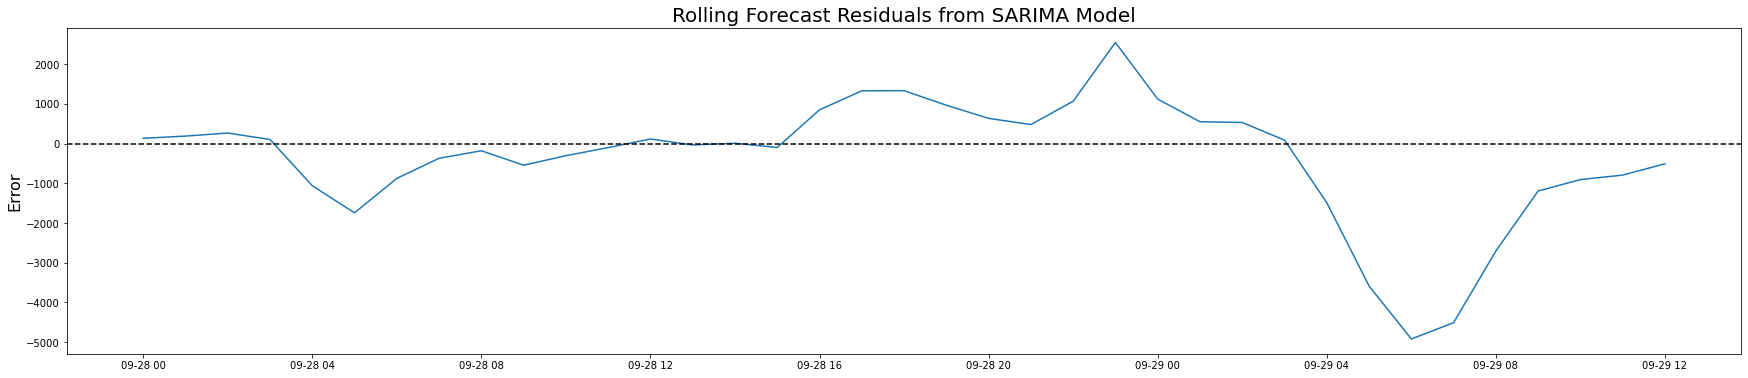

In [280]:
plt.figure(figsize=(30,6))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Production')

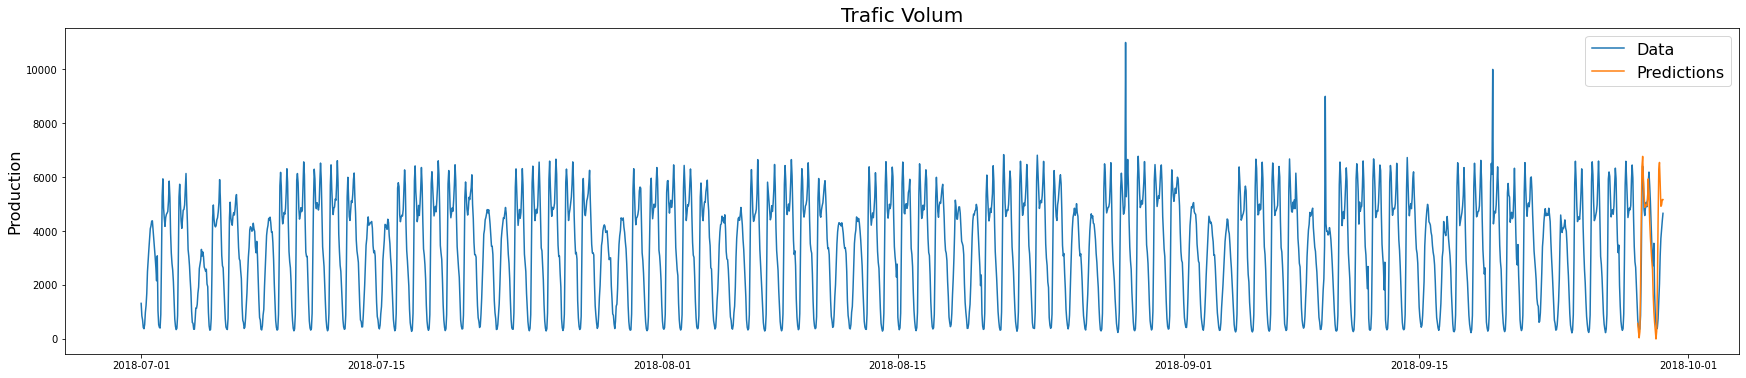

In [281]:
plt.figure(figsize=(30,6))

plt.plot(portion_df)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Trafic Volum', fontsize=20)
plt.ylabel('Production', fontsize=16)
# for year in range(Start_date.year, End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [282]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.6714


In [283]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1568.5105001845507


# Detecting the Anomaly

# 1: Deviation Method

Text(0, 0.5, 'Trafic')

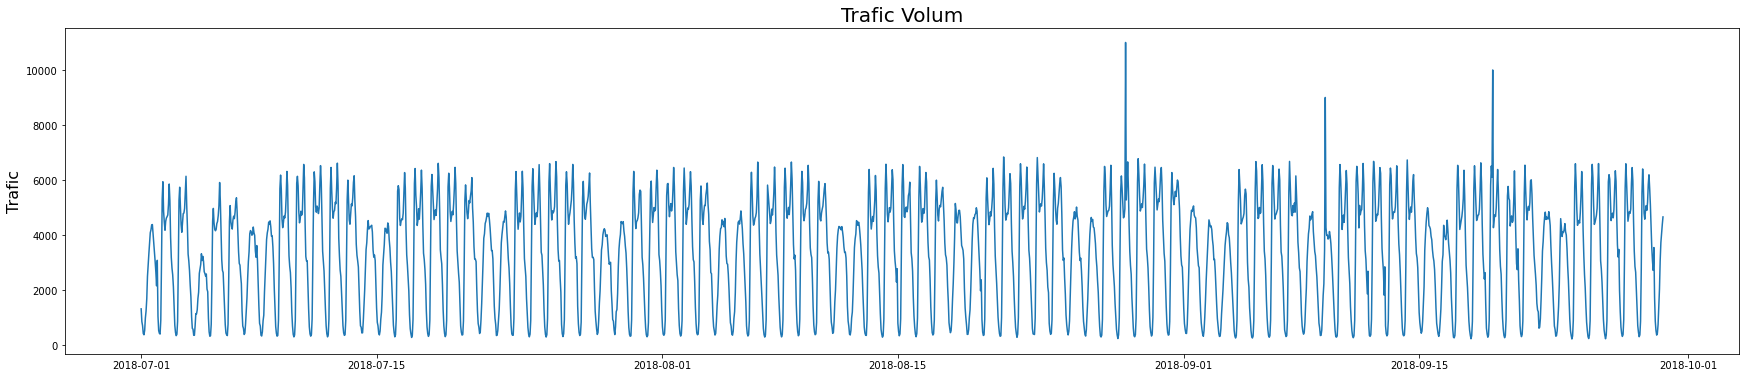

In [297]:
plt.figure(figsize=(30,6))
plt.plot(portion_df)
plt.title('Trafic Volum', fontsize=20)
plt.ylabel('Trafic', fontsize=16)
# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [298]:
rolling_deviations = pd.Series(dtype=float, index = portion_df.index)

In [299]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = portion_df.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [300]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

Text(0, 0.5, 'Sales')

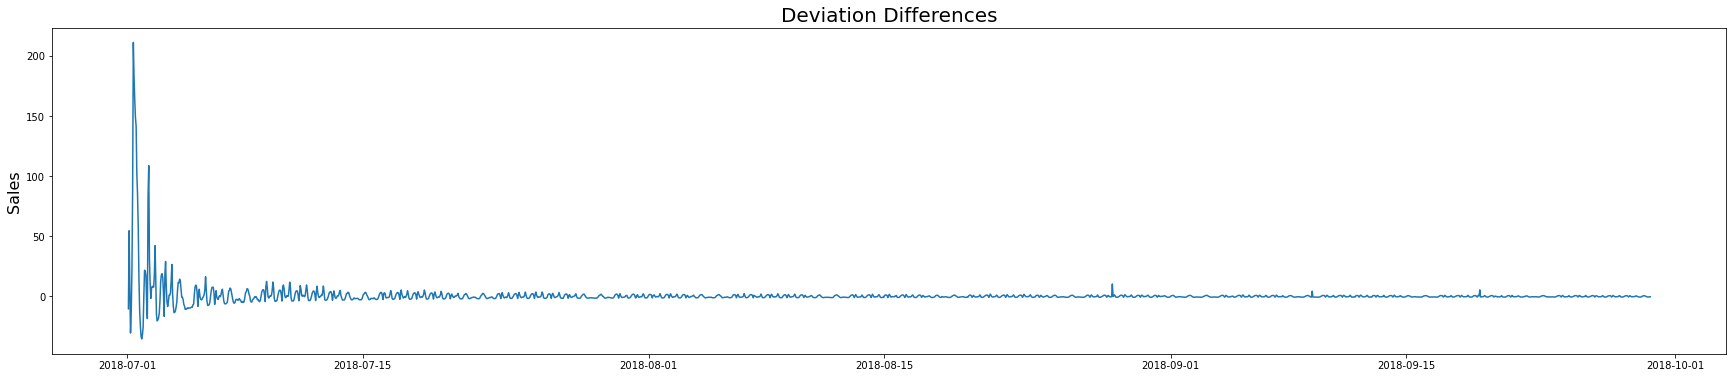

In [301]:
plt.figure(figsize=(30,6))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# 2: Seasonal Method

In [302]:
month_deviations = portion_df.groupby(lambda d: d.hour).std()

Text(0, 0.5, 'Sales')

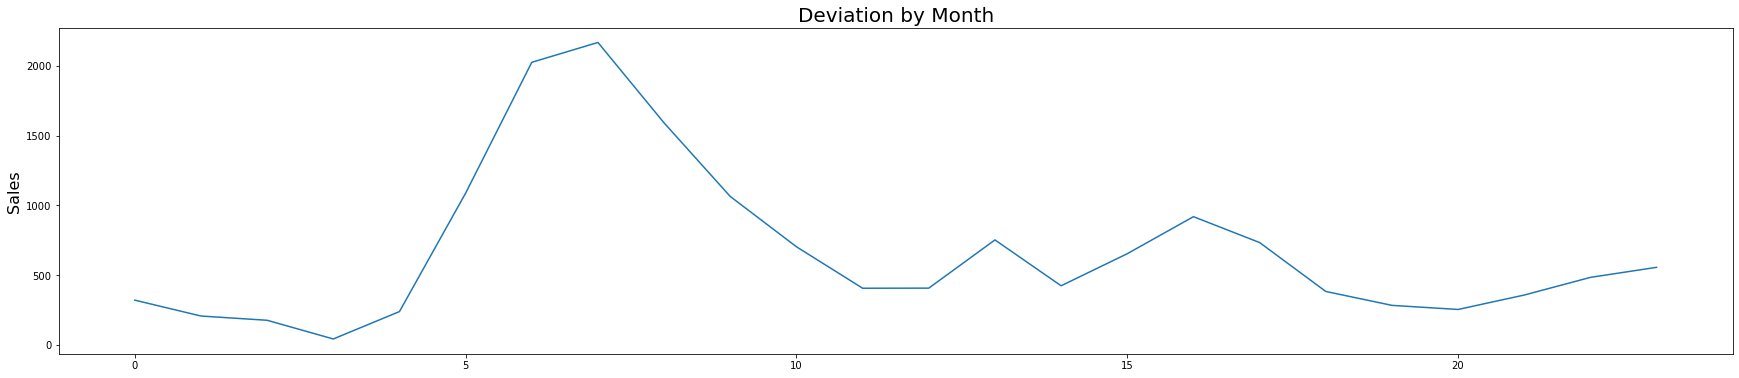

In [303]:
plt.figure(figsize=(30,6))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

# So, the anomaly occurs in a December

In [307]:
december_data = portion_df[portion_df.index.hour.isin([6,7,8,9,10,11,12,13,14])]

In [308]:
december_data

date_time
2018-07-01 06:00:00     979
2018-07-01 07:00:00    1237
2018-07-01 08:00:00    1682
2018-07-01 09:00:00    2495
2018-07-01 10:00:00    2924
                       ... 
2018-09-29 08:00:00    3073
2018-09-29 09:00:00    3725
2018-09-29 10:00:00    4059
2018-09-29 11:00:00    4378
2018-09-29 12:00:00    4657
Name: traffic_volume, Length: 814, dtype: int64

In [309]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date
        print(curr_anomaly, curr_dev)

2018-07-01 06:00:00 1253.9834719577502
2018-07-08 06:00:00 1253.6115223706804
2018-08-28 13:00:00 1240.210745413545


In [310]:
curr_anomaly

Timestamp('2018-08-28 13:00:00')

# use mean of other hours

In [311]:
adjusted_data = portion_df.copy()
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

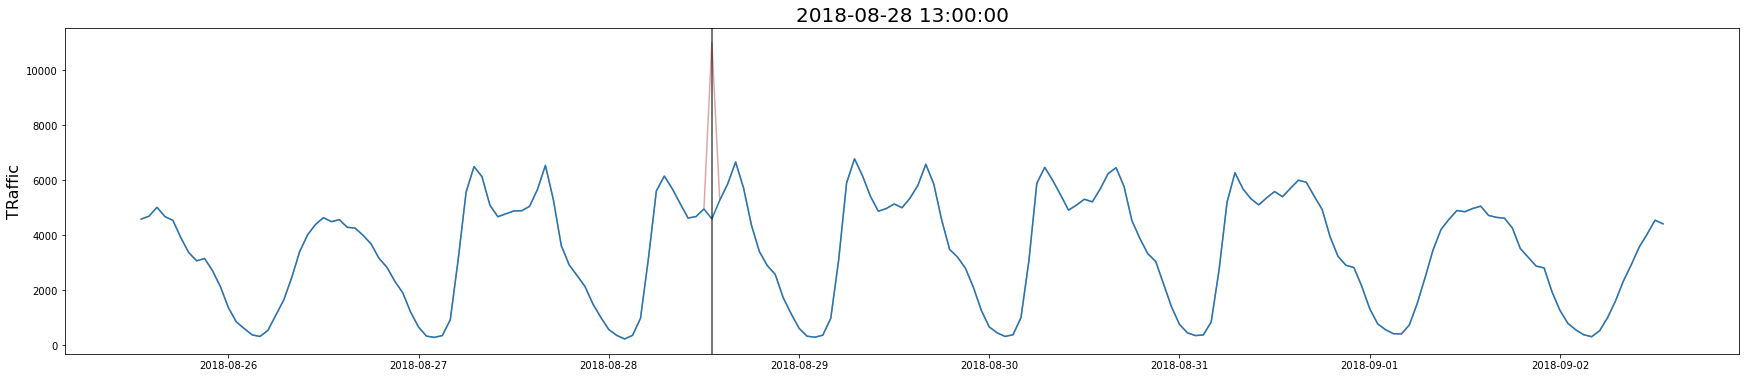

In [313]:
plt.figure(figsize=(30,6))
plt.plot(portion_df[curr_anomaly-timedelta(days=3):curr_anomaly+timedelta(days=5)], color='firebrick', alpha=0.4)
plt.plot(adjusted_data[curr_anomaly-timedelta(days=3):curr_anomaly+timedelta(days=5)])
plt.title(curr_anomaly, fontsize=20)
plt.ylabel('TRaffic', fontsize=16)
# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)

# Resulting Predictions

In [314]:
train_end = datetime(2018,9,25)

test_data = portion_df[train_end + timedelta(days=1):]

In [315]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01865D+00    |proj g|=  3.45001D-01

At iterate    5    f=  7.91540D+00    |proj g|=  6.38867D-02

At iterate   10    f=  7.87966D+00    |proj g|=  1.52809D-02

At iterate   15    f=  7.87510D+00    |proj g|=  9.91742D-04

At iterate   20    f=  7.87475D+00    |proj g|=  1.42836D-03

At iterate   25    f=  7.85404D+00    |proj g|=  2.58129D-03

At iterate   30    f=  7.84768D+00    |proj g|=  2.74089D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91518D+00    |proj g|=  6.38953D-02

At iterate   10    f=  7.87943D+00    |proj g|=  1.52836D-02

At iterate   15    f=  7.87487D+00    |proj g|=  9.96650D-04

At iterate   20    f=  7.87452D+00    |proj g|=  1.42382D-03

At iterate   25    f=  7.85387D+00    |proj g|=  2.52129D-03

At iterate   30    f=  7.84830D+00    |proj g|=  8.77170D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     46      1     0     0   9.378D-06   7.847D+00
  F =   7.8474441274078277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91494D+00    |proj g|=  6.39084D-02

At iterate   10    f=  7.87919D+00    |proj g|=  1.52858D-02

At iterate   15    f=  7.87462D+00    |proj g|=  1.00128D-03

At iterate   20    f=  7.87428D+00    |proj g|=  1.41978D-03

At iterate   25    f=  7.85366D+00    |proj g|=  2.49040D-03

At iterate   30    f=  7.84724D+00    |proj g|=  8.47321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     44      1     0     0   4.135D-06   7.847D+00
  F =   7.8472038745439869     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91478D+00    |proj g|=  6.39682D-02

At iterate   10    f=  7.87903D+00    |proj g|=  1.52985D-02

At iterate   15    f=  7.87446D+00    |proj g|=  1.05304D-03

At iterate   20    f=  7.87412D+00    |proj g|=  1.38095D-03

At iterate   25    f=  7.85346D+00    |proj g|=  2.48361D-03

At iterate   30    f=  7.84745D+00    |proj g|=  4.99155D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     47      1     0     0   4.152D-06   7.847D+00
  F =   7.8470539816786768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91484D+00    |proj g|=  6.41551D-02

At iterate   10    f=  7.87902D+00    |proj g|=  1.53342D-02

At iterate   15    f=  7.87445D+00    |proj g|=  1.15373D-03

At iterate   20    f=  7.87409D+00    |proj g|=  1.30820D-03

At iterate   25    f=  7.85371D+00    |proj g|=  2.23528D-03

At iterate   30    f=  7.84725D+00    |proj g|=  4.65087D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     45      1     0     0   5.351D-06   7.847D+00
  F =   7.8470488704775763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91589D+00    |proj g|=  6.35423D-02

At iterate   10    f=  7.88008D+00    |proj g|=  1.52557D-02

At iterate   15    f=  7.87555D+00    |proj g|=  2.81996D-03

At iterate   20    f=  7.87530D+00    |proj g|=  1.85123D-03

At iterate   25    f=  7.85772D+00    |proj g|=  2.28088D-03
  ys=-3.586E-03  -gs= 2.429E-03 BFGS update SKIPPED

At iterate   30    f=  7.85202D+00    |proj g|=  6.50151D-04

At iterate   35    f=  7.84790D+00    |proj g|=  4.15553D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     55      1     1     0   7.093D-06   7.848D+00
  F =   7.8478964216750162     

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02086D+00    |proj g|=  3.44996D-01

At iterate    5    f=  7.91731D+00    |proj g|=  6.26238D-02

At iterate   10    f=  7.88152D+00    |proj g|=  1.51042D-02

At iterate   15    f=  7.87684D+00    |proj g|=  1.09744D-03

At iterate   20    f=  7.87664D+00    |proj g|=  1.63912D-03

At iterate   25    f=  7.85829D+00    |proj g|=  5.74480D-03

At iterate   30    f=  7.85670D+00    |proj g|=  1.04302D-02
  ys=-6.603E-04  -gs= 2.072E-03 BFGS update SKIPPED

At iterate   35    f=  7.84915D+00    |proj g|=  9.64631D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91709D+00    |proj g|=  6.25757D-02

At iterate   10    f=  7.88130D+00    |proj g|=  1.50945D-02

At iterate   15    f=  7.87662D+00    |proj g|=  1.05654D-03

At iterate   20    f=  7.87642D+00    |proj g|=  1.61177D-03

At iterate   25    f=  7.85739D+00    |proj g|=  3.47971D-03

At iterate   30    f=  7.85330D+00    |proj g|=  1.52806D-02

At iterate   35    f=  7.84889D+00    |proj g|=  4.19397D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     62      1     0     0   6.660D-07   7.849D+00
  F =   7.8488753251044985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91718D+00    |proj g|=  6.26083D-02

At iterate   10    f=  7.88138D+00    |proj g|=  1.50989D-02

At iterate   15    f=  7.87669D+00    |proj g|=  1.07763D-03

At iterate   20    f=  7.87650D+00    |proj g|=  1.61924D-03

At iterate   25    f=  7.85774D+00    |proj g|=  4.36722D-03

At iterate   30    f=  7.84908D+00    |proj g|=  3.11967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     47      1     0     0   1.132D-06   7.849D+00
  F =   7.8489865084959058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91769D+00    |proj g|=  6.24976D-02

At iterate   10    f=  7.88201D+00    |proj g|=  1.50784D-02

At iterate   15    f=  7.87734D+00    |proj g|=  1.32754D-03

At iterate   20    f=  7.87716D+00    |proj g|=  1.76343D-03

At iterate   25    f=  7.86078D+00    |proj g|=  7.72445D-03

At iterate   30    f=  7.85950D+00    |proj g|=  2.27048D-03
  ys=-1.663E-02  -gs= 1.985E-03 BFGS update SKIPPED

At iterate   35    f=  7.85174D+00    |proj g|=  1.16116D-02

At iterate   40    f=  7.84971D+00    |proj g|=  3.22764D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     58      1     1

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91800D+00    |proj g|=  6.25015D-02

At iterate   10    f=  7.88223D+00    |proj g|=  1.50847D-02

At iterate   15    f=  7.87754D+00    |proj g|=  8.81031D-04

At iterate   20    f=  7.87730D+00    |proj g|=  1.48945D-03

At iterate   25    f=  7.85684D+00    |proj g|=  2.76097D-03

At iterate   30    f=  7.84989D+00    |proj g|=  2.17754D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     48      1     0     0   2.444D-06   7.850D+00
  F =   7.8498854692608484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91779D+00    |proj g|=  6.25552D-02

At iterate   10    f=  7.88202D+00    |proj g|=  1.50926D-02

At iterate   15    f=  7.87733D+00    |proj g|=  9.91771D-04

At iterate   20    f=  7.87712D+00    |proj g|=  1.55887D-03

At iterate   25    f=  7.85731D+00    |proj g|=  1.06332D-03

At iterate   30    f=  7.85325D+00    |proj g|=  1.20384D-02

At iterate   35    f=  7.84970D+00    |proj g|=  2.24170D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     66      1     0     0   7.865D-07   7.850D+00
  F =   7.8496955533683330     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02089D+00    |proj g|=  3.44702D-01

At iterate    5    f=  7.91755D+00    |proj g|=  6.25642D-02

At iterate   10    f=  7.88178D+00    |proj g|=  1.50923D-02

At iterate   15    f=  7.87710D+00    |proj g|=  1.01433D-03

At iterate   20    f=  7.87689D+00    |proj g|=  1.57994D-03

At iterate   25    f=  7.85744D+00    |proj g|=  1.77547D-03

At iterate   30    f=  7.84947D+00    |proj g|=  3.58266D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02063D+00    |proj g|=  3.44585D-01

At iterate    5    f=  7.91731D+00    |proj g|=  6.25587D-02

At iterate   10    f=  7.88154D+00    |proj g|=  1.50919D-02

At iterate   15    f=  7.87686D+00    |proj g|=  1.00529D-03

At iterate   20    f=  7.87665D+00    |proj g|=  1.57127D-03

At iterate   25    f=  7.85702D+00    |proj g|=  1.44567D-03

At iterate   30    f=  7.84930D+00    |proj g|=  2.11265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91708D+00    |proj g|=  6.25461D-02

At iterate   10    f=  7.88132D+00    |proj g|=  1.50902D-02

At iterate   15    f=  7.87663D+00    |proj g|=  9.91715D-04

At iterate   20    f=  7.87642D+00    |proj g|=  1.55917D-03

At iterate   25    f=  7.85657D+00    |proj g|=  7.62408D-04

At iterate   30    f=  7.84901D+00    |proj g|=  6.93156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     45      1     0     0   9.869D-07   7.849D+00
  F =   7.8490021108032551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02039D+00    |proj g|=  3.44100D-01

At iterate    5    f=  7.91711D+00    |proj g|=  6.25225D-02

At iterate   10    f=  7.88133D+00    |proj g|=  1.50942D-02

At iterate   15    f=  7.87663D+00    |proj g|=  9.00653D-04

At iterate   20    f=  7.87640D+00    |proj g|=  1.48892D-03

At iterate   25    f=  7.85586D+00    |proj g|=  2.78941D-03

At iterate   30    f=  7.84905D+00    |proj g|=  1.92063D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91739D+00    |proj g|=  6.24925D-02

At iterate   10    f=  7.88161D+00    |proj g|=  1.51136D-02

At iterate   15    f=  7.87690D+00    |proj g|=  8.60957D-04

At iterate   20    f=  7.87665D+00    |proj g|=  1.45689D-03

At iterate   25    f=  7.85684D+00    |proj g|=  1.68239D-03

At iterate   30    f=  7.85224D+00    |proj g|=  1.42551D-02

At iterate   35    f=  7.84914D+00    |proj g|=  4.73098D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     64      1     0     0   9.190D-06   7.849D+00
  F =   7.8491367006108979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/umer/miniforge3/envs/ml/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.91727D+00    |proj g|=  6.28438D-02

At iterate   10    f=  7.88138D+00    |proj g|=  1.51842D-02

At iterate   15    f=  7.87665D+00    |proj g|=  1.30751D-03

At iterate   20    f=  7.87647D+00    |proj g|=  1.69457D-03

At iterate   25    f=  7.85868D+00    |proj g|=  4.41329D-03

At iterate   30    f=  7.85816D+00    |proj g|=  4.35127D-03
  ys=-1.378E-02  -gs= 2.106E-03 BFGS update SKIPPED
  ys=-7.713E+03  -gs= 7.054E-01 BFGS update SKIPPED
  ys=-7.321E+00  -gs= 8.874E-02 BFGS update SKIPPED


LinAlgError: LU decomposition error.

In [316]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

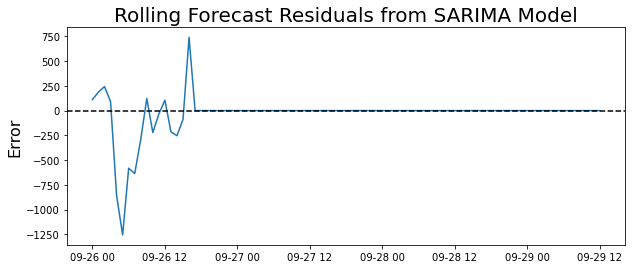

In [317]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Production')

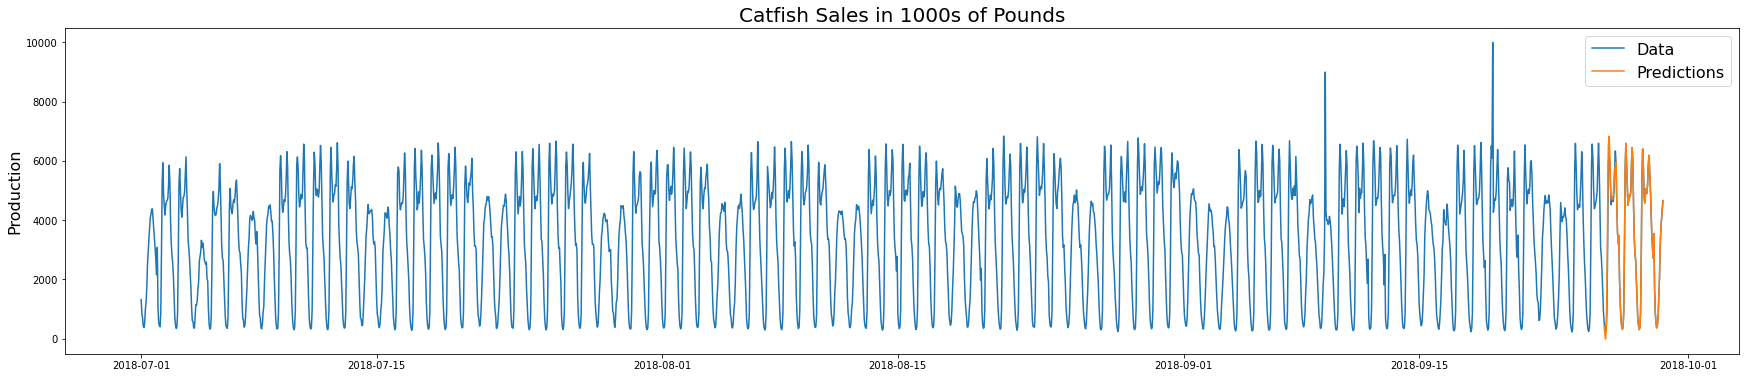

In [318]:
plt.figure(figsize=(30,6))

plt.plot(adjusted_data)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
# for year in range(Start_date.year,End_date.year+1):
#     plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [319]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0471


In [320]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 216.9341456050932


# Seasonal-Trend Decomposition using LOESS (STL)

## Perform STL Decomp

Text(0, 0.5, 'Trafic')

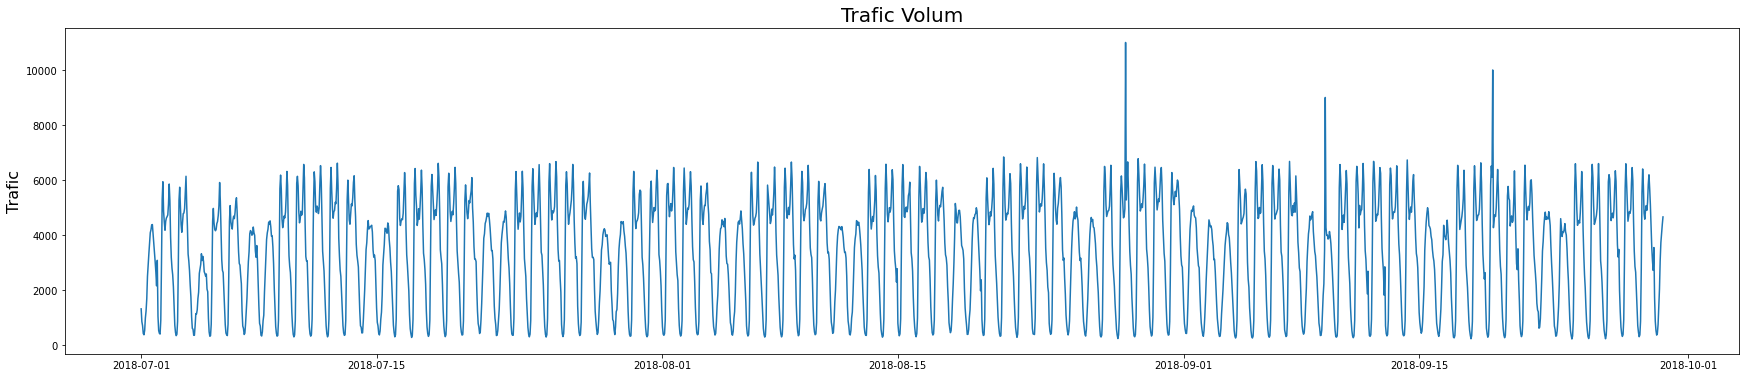

In [322]:
plt.figure(figsize=(30,6))
plt.plot(portion_df)
plt.title('Trafic Volum', fontsize=20)
plt.ylabel('Trafic', fontsize=16)

In [435]:
stl = STL(portion_df, seasonal=13, period=24*7)
result = stl.fit()

In [436]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

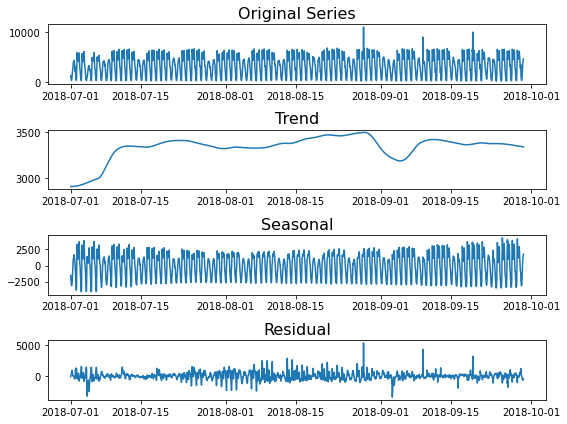

In [437]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(portion_df)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

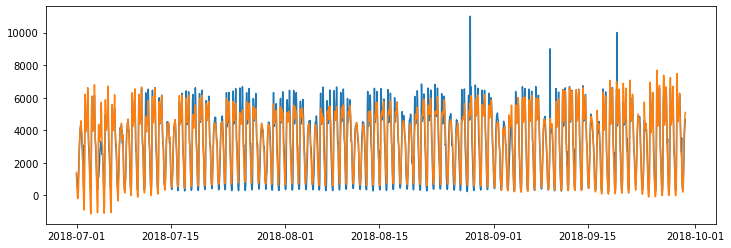

In [438]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(portion_df)
plt.plot(estimated)

# Anomaly Detection

In [439]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(17711.0, 17805.5)

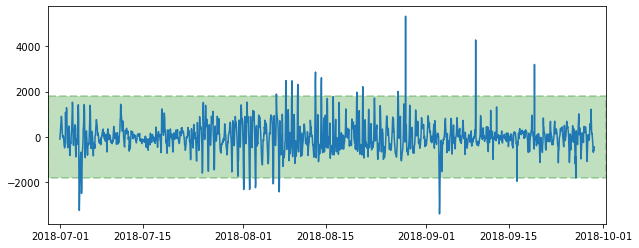

In [440]:
plt.figure(figsize=(10,4))
plt.plot(resid)
delta = timedelta(days=2)
plt.fill_between([Start_date-delta, End_date+delta], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(Start_date-delta, End_date+delta)

In [441]:
anomalies = pd.DataFrame(portion_df[(resid < lower) | (resid > upper)])

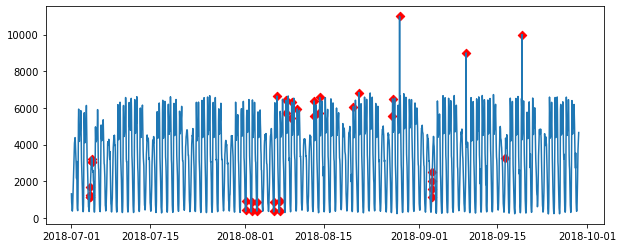

In [442]:
plt.figure(figsize=(10,4))
plt.plot(portion_df)
# for year in range(,2021):
#     plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies.traffic_volume, color='r', marker='D')

In [443]:
anomalies

,traffic_volume
date_time,
2018-07-04 06:00:00,1141
2018-07-04 07:00:00,1128
2018-07-04 08:00:00,1275
2018-07-04 09:00:00,1687
2018-07-04 15:00:00,3070
2018-07-04 16:00:00,3224
2018-07-04 17:00:00,3045
2018-08-01 03:00:00,409
2018-08-01 04:00:00,908
